In [45]:
#  --------------------------------------------projet analyse des donnees : 3iir grp 6---------------------------------------------
#  -------------------------------------------------GROUPE 6  -> netflix.csv    ----------------------------------------------------

#  REDA BOUIMAKLIOUINE .
#  GHAYT EL IDRISSI DAFALI  .
#  Abdellah Jorf

#-----------------------------------------------------------------------------------------------------------------------------------

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("netflix.csv")  

# Affichons les premières lignes du jeu de données pour avoir un aperçu
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [33]:
top_categories = data['listed_in'].value_counts().head(5)
print("Top 5 des meilleures catégories :")
print(top_categories)


Top 5 des meilleures catégories :
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64


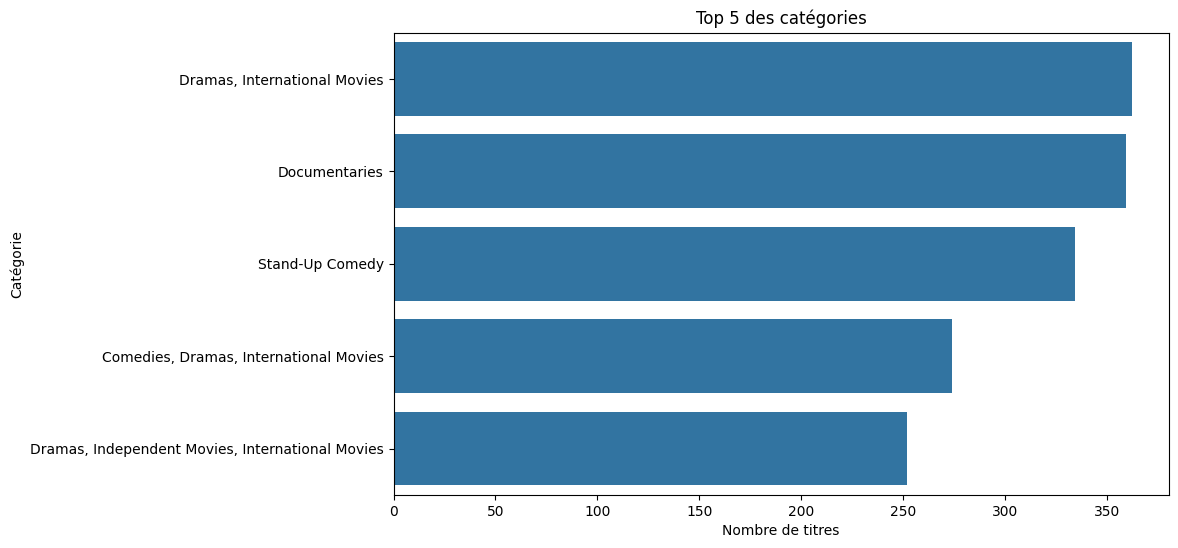

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='listed_in', data=data, order=data['listed_in'].value_counts().index[:5])
plt.title('Top 5 des catégories')
plt.xlabel('Nombre de titres')
plt.ylabel('Catégorie')
plt.show()


In [35]:
top_directors = data['director'].value_counts().head(5)
print("\nTop 5 des réalisateurs :")
print(top_directors)



Top 5 des réalisateurs :
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64


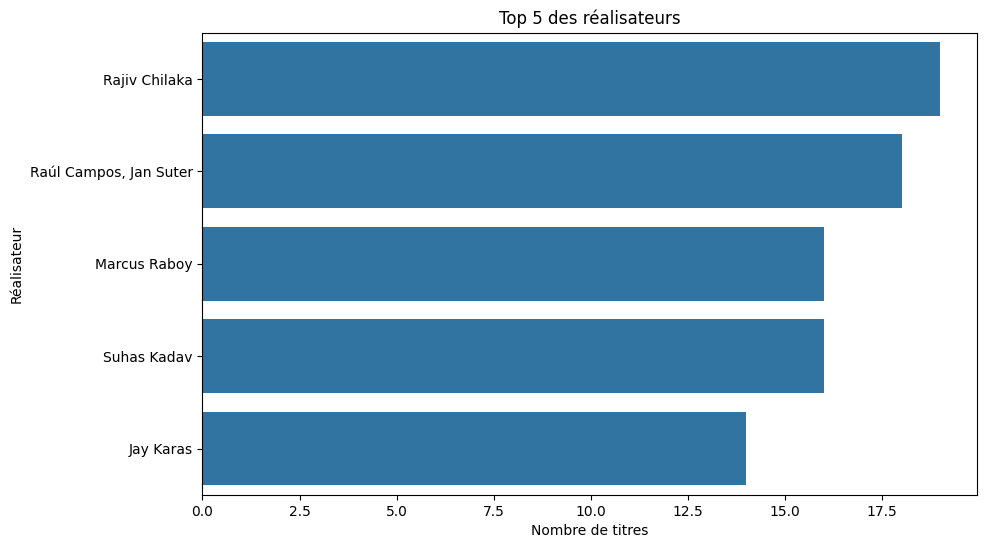

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(y='director', data=data, order=data['director'].value_counts().index[:5])
plt.title('Top 5 des réalisateurs')
plt.xlabel('Nombre de titres')
plt.ylabel('Réalisateur')
plt.show()


In [37]:
import re

tv_shows = data[data['type'] == 'TV Show']
# Convertir la colonne 'duration' en un format numérique en extrayant les parties numériques
tv_shows['duration'] = tv_shows['duration'].apply(lambda x: re.findall(r'\d+', x)[0]).astype(int)

top_tv_series = tv_shows.nlargest(5, 'duration')
print("\nLes cinq meilleures séries télévisées avec le plus grand nombre de saisons :")
print(top_tv_series[['title', 'duration']])




Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :
                       title  duration
548           Grey's Anatomy        17
2423            Supernatural        15
4798                    NCIS        15
1354               Heartland        13
4220  COMEDIANS of the world        13


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_22060\972149506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration'] = tv_shows['duration'].apply(lambda x: re.findall(r'\d+', x)[0]).astype(int)


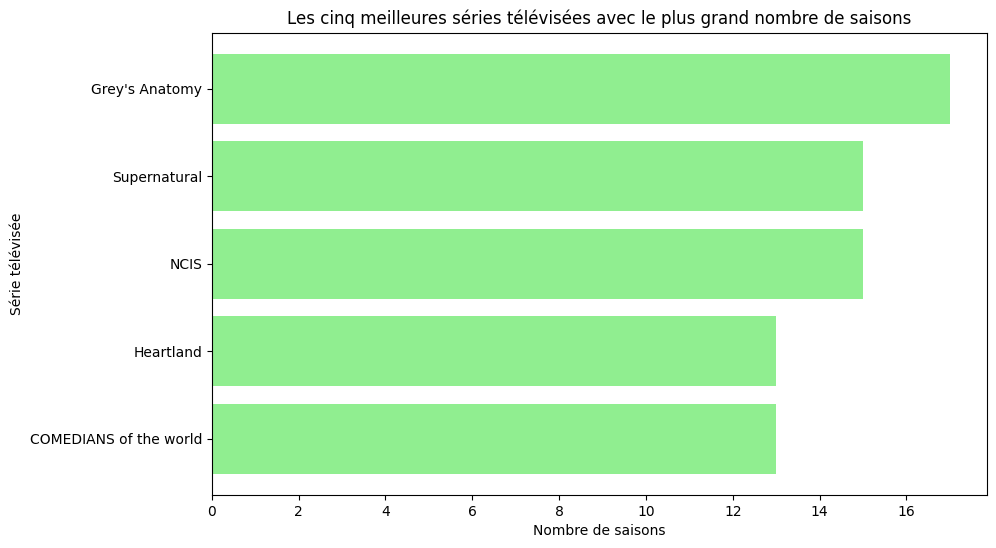

In [42]:
# Convertir la colonne 'duration' en un format numérique en extrayant les parties numériques
data['duration'] = data['duration'].str.extract('(\d+)').astype(float)

tv_shows = data[data['type'] == 'TV Show'].nlargest(5, 'duration')

plt.figure(figsize=(10, 6))
plt.barh(tv_shows['title'], tv_shows['duration'], color='lightgreen')
plt.xlabel('Nombre de saisons')
plt.ylabel('Série télévisée')
plt.title('Les cinq meilleures séries télévisées avec le plus grand nombre de saisons')
plt.gca().invert_yaxis() 
plt.show()



In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Supprimer les valeurs manquantes dans la colonne 'description'
data_cleaned = data.dropna(subset=['description'])

# Utiliser TF-IDF Vectorizer pour représenter les descriptions en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data_cleaned['description'])

# Calculer la similarité cosinus entre les descriptions
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Afficher les premières lignes de la matrice de similarité cosinus
print(cosine_sim)


[[1.         0.         0.         ... 0.         0.01538292 0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.02230089]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.01538292 0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.02230089 ... 0.         0.         1.        ]]


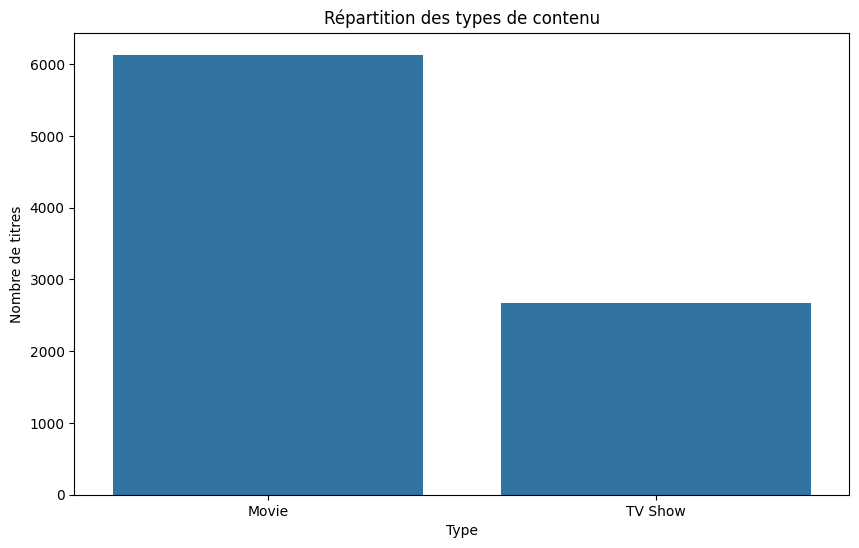

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data)
plt.title('Répartition des types de contenu')
plt.xlabel('Type')
plt.ylabel('Nombre de titres')
plt.show()


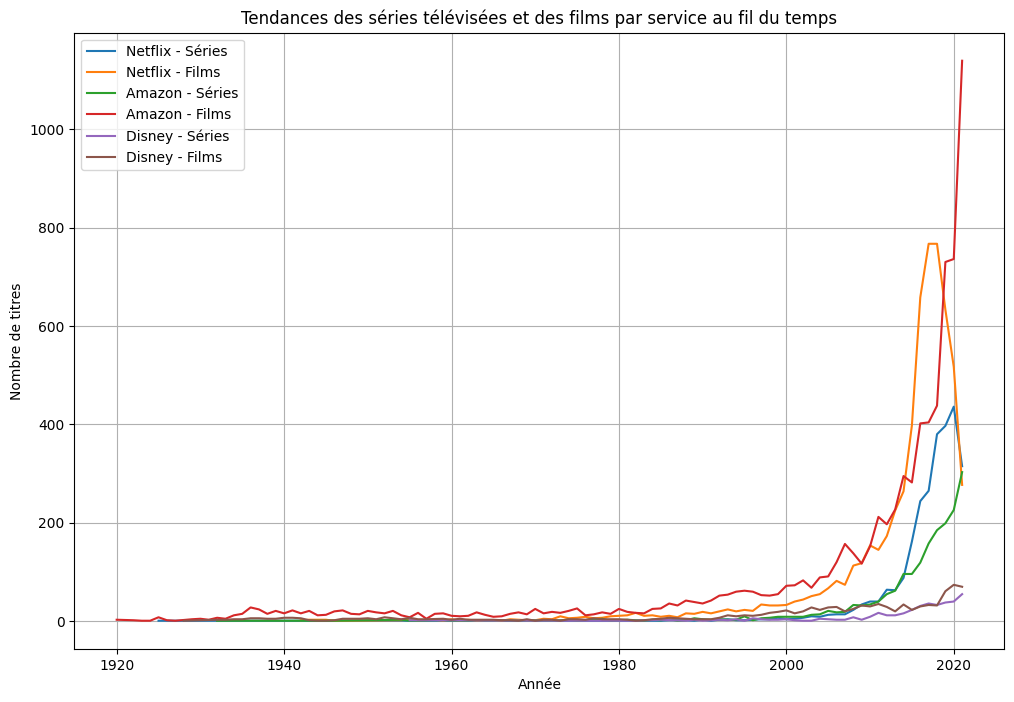

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données pour Netflix, Amazon et Disney
netflix_data = pd.read_csv("netflix.csv")  
amazon_data = pd.read_csv("amazon.csv")
disney_data = pd.read_csv("disney.csv")

# Filtrer les données pour séparer les séries télévisées et les films
netflix_tv_shows = netflix_data[netflix_data['type'] == 'TV Show']
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']

amazon_tv_shows = amazon_data[amazon_data['type'] == 'TV Show']
amazon_movies = amazon_data[amazon_data['type'] == 'Movie']

disney_tv_shows = disney_data[disney_data['type'] == 'TV Show']
disney_movies = disney_data[disney_data['type'] == 'Movie']

# Agréger les données par année pour chaque type de contenu
netflix_tv_shows_per_year = netflix_tv_shows['release_year'].value_counts().sort_index()
netflix_movies_per_year = netflix_movies['release_year'].value_counts().sort_index()

amazon_tv_shows_per_year = amazon_tv_shows['release_year'].value_counts().sort_index()
amazon_movies_per_year = amazon_movies['release_year'].value_counts().sort_index()

disney_tv_shows_per_year = disney_tv_shows['release_year'].value_counts().sort_index()
disney_movies_per_year = disney_movies['release_year'].value_counts().sort_index()

# Visualiser les tendances au fil du temps
plt.figure(figsize=(12, 8))

plt.plot(netflix_tv_shows_per_year.index, netflix_tv_shows_per_year.values, label='Netflix - Séries')
plt.plot(netflix_movies_per_year.index, netflix_movies_per_year.values, label='Netflix - Films')

plt.plot(amazon_tv_shows_per_year.index, amazon_tv_shows_per_year.values, label='Amazon - Séries')
plt.plot(amazon_movies_per_year.index, amazon_movies_per_year.values, label='Amazon - Films')

plt.plot(disney_tv_shows_per_year.index, disney_tv_shows_per_year.values, label='Disney - Séries')
plt.plot(disney_movies_per_year.index, disney_movies_per_year.values, label='Disney - Films')

plt.title('Tendances des séries télévisées et des films par service au fil du temps')
plt.xlabel('Année')
plt.ylabel('Nombre de titres')
plt.legend()
plt.grid(True)
plt.show()
